In [1]:
import os
import mahotas as mt
import cv2 as cv
import glob
import numpy as np
import csv
import re
import count
import matplotlib.pyplot as plt

# Dataset

### A set of 202 diseased(1- algal leaf spot, 2- blister blight, 3- grey spot) and healthy(0) tea leaves are collected as dataset from High Field Tea Estate, Coonoor, Tamil Nadu, India.

## The Next Step is Image Segmentation.

#### A python script file is used for background removal and extraction of area of interest.

## The Next Step is the Feature Extraction. 

#### 13 Texture Features( Haralick features are used).
#### Color Features
#### Shape Features

In [2]:
def extract_feature(image):
	
	##Color Feature
	(mean,std) = cv.meanStdDev(image)
	
	print(len(mean), type(mean))
	
	print(len(std), type(std))
	
	color_feature = np.array(mean)
	
	color_feature = np.concatenate([color_feature,std]).flatten()
	
	print(len(color_feature))
	
	##Texture Feature
	gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
	
	textures = mt.features.haralick(gray)
	
	ht_mean = textures.mean(axis = 0)
	
	print(len(ht_mean), type(ht_mean))
	
	
	## Shape Features
	ret,thresh = cv.threshold(gray,127,255,0)
	
	x,contours, hierarchy =   cv.findContours(thresh.copy(),1,2)
	
	cnt = contours[0]
	
	area = cv.contourArea(cnt)
	print(type(area))
	
	perimeter = cv.arcLength(cnt,True)
	print(type(perimeter))
	
	shape = np.array([])
	shape = np.append(shape,area)
	shape = np.append(shape,perimeter)
	print(len(shape))
	
	
	print(len(ht_mean) + len(std) + len(mean) + len(shape))
	
	ht_mean = np.concatenate([ht_mean,color_feature]).flatten()
	
	ht_mean = np.concatenate([ht_mean,shape]).flatten()
	
	print(len(ht_mean),ht_mean.shape)
	
	return(ht_mean)

# Creating Comma-Seperating file

#### A CSV file, having 21 features (13 texture features, 6 color features and 2 shape featrures) and appropriate label(0- Healthy, 1- Algal Leaf Spot, 2- blister blight, 3- Grey Spot), is created.

In [3]:
def create_csv():	
	
	files = count.images()
	mydata = [['energy','contrast','correlation','variance','inverse difference moment','sum average','sum variance','sum entropy','entropy','difference variance','difference entropy','info_corr',
			   'maximal_corr_coeff','mean_B','mean_G','mean_R','std_B','std_G','std_R','area','perimeter','label']]
	
	path = '/home/ln-2/Desktop/Alok/SVM/alok1/results'
	for file in files:	
		print(path+ file)
		image = cv.imread(path + '/' + file)
		print(file)
		#gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
		#means = cv.mean(image)
		#print(len(means))
		print(image.shape)
		dim = (512,512)
		r_img = cv.resize(image,dim)
		print(r_img.shape)
		feature = extract_feature(r_img)
		label = 0
		
		## Healthy leaf is labeled as 0.
		if(re.search('test[1-9]+',file)):
			label = 0
		else:
			## Algal leaf spot is labeled as 1.
			if(re.search('algal[1-9]+',file)):
				label = 1
			## Blister Blight is labeled as 2.	
			elif(re.search('blister[1-9]+',file)):
				label = 2
			## Grey Spot is labled as 3.	
			elif(re.search('grey[1-9]+',file)):
				label = 3
		
		feature = np.append(feature,label)
		print()
		print(len(feature))
		feature = feature.tolist()
		mydata.append(feature)
		
	myfile = open('mycsv.csv','w')
	with myfile:
		writer = csv.writer(myfile)
		writer.writerows(mydata)


In [4]:
create_csv()

202
/home/ln-2/Desktop/Alok/SVM/alok1/resultsgrey34.jpg
grey34.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest69.jpg
test69.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest119.jpg
test119.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest28.jpg
test28.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultsgrey1.jpg
grey1.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'nu

13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest114.jpg
test114.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultsgrey10.jpg
grey10.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest24.jpg
test24.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultsgrey4.jpg
grey4.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alo

13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest1.jpg
test1.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest16.jpg
test16.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest8.jpg
test8.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest97.jpg
test97.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/r

13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest151.jpg
test151.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultsgrey15.jpg
grey15.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest48.jpg
test48.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest116.jpg
test116.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM

13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest145.jpg
test145.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest92.jpg
test92.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultsgrey26.jpg
grey26.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest35.jpg
test35.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/a

13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest55.jpg
test55.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultsblister1.jpg
blister1.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest33.jpg
test33.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/SVM/alok1/resultstest137.jpg
test137.jpg
(752, 1040, 3)
(512, 512, 3)
3 <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
6
13 <class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
2
21
21 (21,)

22
/home/ln-2/Desktop/Alok/S

## Importing Panda Library and matplotlib library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
myfile = pd.read_csv('mycsv.csv',sep=',')

In [7]:
myfile.head()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
0,0.151255,83.682817,0.992531,5602.660453,0.524024,166.271382,22326.958994,5.860651,8.105537,0.000905,...,0.994969,29.549824,94.431873,80.634457,37.648830,84.138807,74.804819,2.5,12.242641,3.0
1,0.701767,42.595679,0.992800,2957.291822,0.891638,41.561557,11786.571609,1.974422,2.473410,0.002914,...,0.941292,21.951992,27.125298,7.671936,57.780391,69.075932,34.431439,0.0,0.000000,0.0
2,0.531359,58.631216,0.990318,3027.364926,0.816442,56.930850,12050.828487,3.107701,3.969937,0.002338,...,0.980912,28.331081,37.507488,10.485035,56.147817,69.558627,32.493657,0.0,0.000000,0.0
3,0.021569,168.613335,0.979423,4100.030050,0.400747,240.799945,16231.506865,7.509348,10.394752,0.000551,...,0.998087,25.628231,148.881607,99.524345,45.078397,75.205177,61.267747,2.0,5.656854,0.0
4,0.130438,72.451101,0.974628,1427.872261,0.550085,84.710300,5639.037943,5.681062,7.755388,0.000977,...,0.994639,17.876900,47.727833,40.773682,20.793650,42.261234,38.057497,4.0,10.828427,3.0


In [8]:
myfile.tail()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
197,0.029560,88.591990,0.959792,1102.015195,0.577856,103.310454,4319.468789,6.757758,8.729105,0.001050,...,0.998881,35.178432,52.905010,54.959171,27.326199,33.259695,36.639568,23.5,43.213203,1.0
198,0.109290,105.497714,0.990920,5810.045547,0.573776,196.124179,23134.684474,6.207205,8.071277,0.001130,...,0.998546,54.409065,118.513771,73.734535,66.565131,90.355411,60.412988,2.0,5.656854,0.0
199,0.234705,152.098099,0.983940,4735.327389,0.599432,128.114749,18789.211456,4.912750,6.854427,0.001165,...,0.987966,23.898781,86.202984,35.382290,44.373544,89.599111,48.247114,2.0,5.656854,0.0
200,0.766612,43.470814,0.987879,1792.762001,0.921410,27.683495,7127.577188,1.515934,1.856504,0.003492,...,0.908212,15.858822,19.659817,1.515675,50.281453,60.100835,9.040244,11927.0,851.033612,0.0
201,0.625702,56.327930,0.991809,3437.573504,0.865713,55.309109,13693.966084,2.409132,3.005656,0.003102,...,0.964397,21.811867,34.595039,15.985023,46.840741,72.178082,43.275999,0.5,3.414214,0.0


In [9]:
myfile = myfile.dropna()

In [10]:
myfile[182:]

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
182,0.192417,72.897108,0.993289,5431.398748,0.614740,149.330414,21652.697885,5.561483,7.304616,0.001173,...,0.997275,24.334641,94.499355,54.225159,41.756239,92.422277,56.412872,5.5,9.071068,0.0
183,0.228674,22.062686,0.997575,4547.956061,0.684219,121.122067,18169.761557,5.376793,6.793665,0.001711,...,0.998274,38.379612,65.333393,59.050583,46.733073,71.787567,68.684190,5.5,12.242641,3.0
184,0.153598,63.630726,0.992953,4514.795818,0.531286,145.546529,17995.552545,5.825308,8.031944,0.000964,...,0.995106,79.750870,93.388336,28.942642,74.961494,84.473642,37.316142,0.5,8.242641,3.0
185,0.769301,34.285448,0.992006,2143.851081,0.928766,30.900895,8541.118877,1.511281,1.812599,0.003550,...,0.915109,16.005070,21.314579,3.576118,48.680908,62.979935,18.673438,0.0,0.000000,0.0
186,0.256946,75.104632,0.995231,7873.304376,0.688725,151.374337,31418.112874,5.162098,6.603945,0.001497,...,0.997585,24.964520,87.532627,71.131737,59.350869,100.544815,86.047213,2.0,5.656854,0.0
187,0.034585,211.007311,0.977193,4627.618620,0.404178,233.767679,18299.467171,7.301754,10.246600,0.000536,...,0.997454,27.689655,144.590858,95.801785,47.251831,80.248106,63.827009,2.0,5.656854,0.0
188,0.772205,32.265973,0.993166,2360.266368,0.908587,32.436979,9408.799500,1.552231,1.978297,0.003104,...,0.900063,15.597744,19.756485,9.349380,46.795882,58.779602,31.145390,99.5,53.556349,0.0
189,0.651938,44.382059,0.991639,2653.426582,0.883038,46.206624,10569.324269,2.183957,2.708647,0.002790,...,0.954167,22.975254,29.661224,10.041504,51.726987,65.063372,29.985131,0.0,0.000000,0.0
190,0.146658,50.129835,0.996713,7626.291149,0.658985,198.008494,30455.034760,5.977753,7.546238,0.001335,...,0.998951,74.070999,109.381493,87.345341,74.873640,95.165669,78.769876,10.0,12.485281,2.0
191,0.040459,148.225557,0.986774,5605.183896,0.420295,237.118255,22272.510027,7.397180,10.134563,0.000572,...,0.998695,29.388966,141.190071,107.218483,52.567308,85.176159,72.846905,2.0,5.656854,0.0


### Seperating the labels

In [11]:
my_file = myfile.iloc[:,:-1]

In [12]:
mylabel = myfile.iloc[:,-1]

In [13]:
mylabel = mylabel.astype(int)

In [14]:
my_file[182:]

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,info_corr,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter
182,0.192417,72.897108,0.993289,5431.398748,0.614740,149.330414,21652.697885,5.561483,7.304616,0.001173,...,-0.527975,0.997275,24.334641,94.499355,54.225159,41.756239,92.422277,56.412872,5.5,9.071068
183,0.228674,22.062686,0.997575,4547.956061,0.684219,121.122067,18169.761557,5.376793,6.793665,0.001711,...,-0.591206,0.998274,38.379612,65.333393,59.050583,46.733073,71.787567,68.684190,5.5,12.242641
184,0.153598,63.630726,0.992953,4514.795818,0.531286,145.546529,17995.552545,5.825308,8.031944,0.000964,...,-0.450169,0.995106,79.750870,93.388336,28.942642,74.961494,84.473642,37.316142,0.5,8.242641
185,0.769301,34.285448,0.992006,2143.851081,0.928766,30.900895,8541.118877,1.511281,1.812599,0.003550,...,-0.669718,0.915109,16.005070,21.314579,3.576118,48.680908,62.979935,18.673438,0.0,0.000000
186,0.256946,75.104632,0.995231,7873.304376,0.688725,151.374337,31418.112874,5.162098,6.603945,0.001497,...,-0.577850,0.997585,24.964520,87.532627,71.131737,59.350869,100.544815,86.047213,2.0,5.656854
187,0.034585,211.007311,0.977193,4627.618620,0.404178,233.767679,18299.467171,7.301754,10.246600,0.000536,...,-0.417823,0.997454,27.689655,144.590858,95.801785,47.251831,80.248106,63.827009,2.0,5.656854
188,0.772205,32.265973,0.993166,2360.266368,0.908587,32.436979,9408.799500,1.552231,1.978297,0.003104,...,-0.592231,0.900063,15.597744,19.756485,9.349380,46.795882,58.779602,31.145390,99.5,53.556349
189,0.651938,44.382059,0.991639,2653.426582,0.883038,46.206624,10569.324269,2.183957,2.708647,0.002790,...,-0.617529,0.954167,22.975254,29.661224,10.041504,51.726987,65.063372,29.985131,0.0,0.000000
190,0.146658,50.129835,0.996713,7626.291149,0.658985,198.008494,30455.034760,5.977753,7.546238,0.001335,...,-0.582778,0.998951,74.070999,109.381493,87.345341,74.873640,95.165669,78.769876,10.0,12.485281
191,0.040459,148.225557,0.986774,5605.183896,0.420295,237.118255,22272.510027,7.397180,10.134563,0.000572,...,-0.458772,0.998695,29.388966,141.190071,107.218483,52.567308,85.176159,72.846905,2.0,5.656854


In [15]:
mylabel[182:]

182    0
183    3
184    3
185    0
186    0
187    0
188    0
189    0
190    2
191    0
192    0
193    0
194    0
195    2
196    0
197    1
198    0
199    0
200    0
201    0
Name: label, dtype: int64

## Statistical Analysis

In [16]:
from sklearn import preprocessing

In [17]:
standard = preprocessing.StandardScaler()

In [18]:
mylabel.describe()

count    202.000000
mean       0.618812
std        1.153943
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: label, dtype: float64

In [19]:
my_file['energy'].describe()

count    202.000000
mean       0.449989
std        0.272493
min        0.007383
25%        0.164645
50%        0.555137
75%        0.681422
max        0.857570
Name: energy, dtype: float64

In [20]:
my_file['energy'] = (my_file['energy'] - my_file['energy'].min())/(my_file['energy'].max() - my_file['energy'].min()) 

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
my_file['energy'].describe()

count    202.000000
mean       0.520599
std        0.320510
min        0.000000
25%        0.184974
50%        0.644275
75%        0.792813
max        1.000000
Name: energy, dtype: float64

In [22]:
my_file['contrast'].describe()

count    202.000000
mean      65.700426
std       42.120548
min       20.559969
25%       36.367697
50%       50.444148
75%       79.971658
max      238.228420
Name: contrast, dtype: float64

In [23]:
my_file['contrast'] = (my_file['contrast'] - my_file['contrast'].min())/(my_file['contrast'].max() - my_file['contrast'].min())

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
my_file['contrast'].describe()

count    202.000000
mean       0.207382
std        0.193508
min        0.000000
25%        0.072623
50%        0.137292
75%        0.272946
max        1.000000
Name: contrast, dtype: float64

In [25]:
my_file['correlation'].describe()

count    202.000000
mean       0.990490
std        0.005369
min        0.959792
25%        0.988503
50%        0.991810
75%        0.994156
max        0.997575
Name: correlation, dtype: float64

In [26]:
my_file = my_file.drop('correlation', 1)

In [27]:
my_file['variance'].describe()

count      202.000000
mean      3757.872814
std       1790.173709
min        870.935814
25%       2465.082402
50%       3499.463468
75%       4752.818218
max      10266.490134
Name: variance, dtype: float64

In [28]:
my_file['variance'] = (my_file['variance'] - my_file['variance'].min())/(my_file['variance'].max() - my_file['variance'].min())

In [29]:
my_file['variance'].describe()

count    202.000000
mean       0.307266
std        0.190534
min        0.000000
25%        0.169670
50%        0.279763
75%        0.413162
max        1.000000
Name: variance, dtype: float64

In [30]:
my_file['inverse difference moment'].describe()

count    202.000000
mean       0.748944
std        0.169738
min        0.316277
25%        0.598432
50%        0.837668
75%        0.888959
max        0.948041
Name: inverse difference moment, dtype: float64

In [31]:
my_file['inverse difference moment'] = (my_file['inverse difference moment'] - my_file['inverse difference moment'].min())/(my_file['inverse difference moment'].max() - my_file['inverse difference moment'].min())

In [32]:
my_file['inverse difference moment'].describe()

count    202.000000
mean       0.684856
std        0.268673
min        0.000000
25%        0.446615
50%        0.825293
75%        0.906481
max        1.000000
Name: inverse difference moment, dtype: float64

In [33]:
my_file['sum average'].describe()

count    202.000000
mean      97.614647
std       71.928711
min       16.617906
25%       42.179866
50%       62.632733
75%      148.719413
max      286.685535
Name: sum average, dtype: float64

In [34]:
my_file['sum average'] = (my_file['sum average'] - my_file['sum average'].min())/(my_file['sum average'].max() - my_file['sum average'].min())

In [35]:
my_file['sum average'].describe()

count    202.000000
mean       0.299913
std        0.266336
min        0.000000
25%        0.094650
50%        0.170383
75%        0.489142
max        1.000000
Name: sum average, dtype: float64

In [36]:
my_file['sum variance'].describe()

count      202.000000
mean     14965.790830
std       7138.479236
min       3457.902315
25%       9818.651383
50%      13942.149590
75%      18848.886987
max      40955.804666
Name: sum variance, dtype: float64

In [37]:
my_file['sum variance'] = (my_file['sum variance'] - my_file['sum variance'].min())/(my_file['sum variance'].max() - my_file['sum variance'].min())

In [38]:
my_file['sum variance'].describe()

count    202.000000
mean       0.306894
std        0.190370
min        0.000000
25%        0.169629
50%        0.279596
75%        0.410449
max        1.000000
Name: sum variance, dtype: float64

In [39]:
my_file['sum entropy'].describe()

count    202.000000
mean       3.750295
std        2.045991
min        0.978486
25%        2.049140
50%        2.863879
75%        5.662932
max        7.957388
Name: sum entropy, dtype: float64

In [40]:
my_file['sum entropy'] = (my_file['sum entropy'] - my_file['sum entropy'].min())/(my_file['sum entropy'].max() - my_file['sum entropy'].min())

In [41]:
my_file['sum entropy'].describe()

count    202.000000
mean       0.397170
std        0.293168
min        0.000000
25%        0.153413
50%        0.270156
75%        0.671230
max        1.000000
Name: sum entropy, dtype: float64

In [42]:
my_file['entropy'].describe()

count    202.000000
mean       4.902418
std        2.832211
min        1.210341
25%        2.547233
50%        3.492737
75%        7.477470
max       11.349265
Name: entropy, dtype: float64

In [43]:
my_file['entropy'] = (my_file['entropy'] - my_file['entropy'].min())/(my_file['entropy'].max() - my_file['entropy'].min())

In [44]:
my_file['entropy'].describe()

count    202.000000
mean       0.364149
std        0.279340
min        0.000000
25%        0.131857
50%        0.225112
75%        0.618126
max        1.000000
Name: entropy, dtype: float64

In [45]:
my_file['difference variance'].describe()

count    202.000000
mean       0.002162
std        0.000972
min        0.000383
25%        0.001173
50%        0.002487
75%        0.002906
max        0.004024
Name: difference variance, dtype: float64

In [46]:
my_file['difference variance'] = (my_file['difference variance'] - my_file['difference variance'].min())/(my_file['difference variance'].max() - my_file['difference variance'].min())

In [47]:
my_file['difference variance'].describe()

count    202.000000
mean       0.488644
std        0.267015
min        0.000000
25%        0.216942
50%        0.577768
75%        0.692815
max        1.000000
Name: difference variance, dtype: float64

In [48]:
my_file['difference entropy'].describe()

count    202.000000
mean       1.844972
std        0.914575
min        0.592005
25%        1.076601
50%        1.436997
75%        2.581673
max        4.194239
Name: difference entropy, dtype: float64

In [49]:
my_file['difference entropy'] = (my_file['difference entropy'] - my_file['difference entropy'].min())/(my_file['difference entropy'].max() - my_file['difference entropy'].min())

In [50]:
my_file['difference entropy'].describe()

count    202.000000
mean       0.347831
std        0.253891
min        0.000000
25%        0.134527
50%        0.234574
75%        0.552343
max        1.000000
Name: difference entropy, dtype: float64

In [51]:
my_file['info_corr'].describe()

count    202.000000
mean      -0.566764
std        0.074023
min       -0.689997
25%       -0.620178
50%       -0.587485
75%       -0.518922
max       -0.324361
Name: info_corr, dtype: float64

In [52]:
my_file = my_file.drop('info_corr', 1)

In [53]:
my_file['maximal_corr_coeff'].describe()

count    202.000000
mean       0.964144
std        0.039334
min        0.823801
25%        0.946784
50%        0.974496
75%        0.996552
max        0.999570
Name: maximal_corr_coeff, dtype: float64

In [54]:
my_file = my_file.drop('maximal_corr_coeff', 1)

In [55]:
my_file['mean_B'].describe()

count    202.000000
mean      28.971899
std       15.828901
min        3.971340
25%       18.062471
50%       24.345436
75%       35.163239
max       85.481976
Name: mean_B, dtype: float64

In [56]:
my_file['mean_B'] = (my_file['mean_B'] - my_file['mean_B'].min())/(my_file['mean_B'].max() - my_file['mean_B'].min())

In [57]:
my_file['mean_B'].describe()

count    202.000000
mean       0.306715
std        0.194194
min        0.000000
25%        0.172875
50%        0.249956
75%        0.382673
max        1.000000
Name: mean_B, dtype: float64

In [58]:
my_file['mean_G'].describe()

count    202.000000
mean      59.556504
std       42.064186
min       11.144627
25%       26.601417
50%       39.483566
75%       92.039097
max      168.650845
Name: mean_G, dtype: float64

In [59]:
my_file['mean_G'] = (my_file['mean_G'] - my_file['mean_G'].min())/(my_file['mean_G'].max() - my_file['mean_G'].min())

In [60]:
my_file['mean_G'].describe()

count    202.000000
mean       0.307365
std        0.267064
min        0.000000
25%        0.098134
50%        0.179923
75%        0.513595
max        1.000000
Name: mean_G, dtype: float64

In [61]:
my_file['mean_R'].describe()

count    202.000000
mean      34.826111
std       35.821593
min        0.762230
25%        6.179100
50%       17.057322
75%       66.565775
max      130.789558
Name: mean_R, dtype: float64

In [62]:
my_file['mean_R'] = (my_file['mean_R'] - my_file['mean_R'].min())/(my_file['mean_R'].max() - my_file['mean_R'].min())

In [63]:
my_file['mean_R'].describe()

count    202.000000
mean       0.261975
std        0.275493
min        0.000000
25%        0.041659
50%        0.125321
75%        0.506075
max        1.000000
Name: mean_R, dtype: float64

In [64]:
my_file['std_B'].describe()

count    202.000000
mean      51.996351
std       14.095391
min       13.611756
25%       43.921763
50%       51.867219
75%       61.865402
max       92.524352
Name: std_B, dtype: float64

In [65]:
my_file['std_B'] = (my_file['std_B'] - my_file['std_B'].min())/(my_file['std_B'].max() - my_file['std_B'].min())

In [66]:
my_file['std_B'].describe()

count    202.000000
mean       0.486419
std        0.178620
min        0.000000
25%        0.384096
50%        0.484783
75%        0.611482
max        1.000000
Name: std_B, dtype: float64

In [67]:
my_file['std_G'].describe()

count    202.000000
mean      72.999904
std       15.286676
min       30.477614
25%       63.136441
50%       73.541901
75%       84.413857
max      117.730371
Name: std_G, dtype: float64

In [68]:
my_file['std_G'] = (my_file['std_G'] - my_file['std_G'].min())/(my_file['std_G'].max() - my_file['std_G'].min())

In [69]:
my_file['std_G'].describe()

count    202.000000
mean       0.487346
std        0.175200
min        0.000000
25%        0.374301
50%        0.493558
75%        0.618161
max        1.000000
Name: std_G, dtype: float64

In [70]:
my_file['std_R'].describe()

count    202.000000
mean      41.956997
std       22.791601
min        5.189059
25%       21.951760
50%       39.402918
75%       60.352599
max       99.574606
Name: std_R, dtype: float64

In [71]:
my_file['std_R'] = (my_file['std_R'] - my_file['std_R'].min())/(my_file['std_R'].max() - my_file['std_R'].min())

In [72]:
my_file['std_R'].describe()

count    202.000000
mean       0.389551
std        0.241473
min        0.000000
25%        0.177598
50%        0.362490
75%        0.584449
max        1.000000
Name: std_R, dtype: float64

In [73]:
my_file['area'].describe()

count      202.000000
mean        69.366337
std        839.146288
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max      11927.000000
Name: area, dtype: float64

In [74]:
my_file = my_file.drop('area', 1)

In [75]:
my_file['perimeter'].describe()

count    202.000000
mean      15.348125
std       62.464979
min        0.000000
25%        3.560660
50%        5.656854
75%       11.071068
max      851.033612
Name: perimeter, dtype: float64

In [76]:
my_file['perimeter'] = my_file['perimeter'].map({0.000000: my_file['perimeter'].mean()})

In [77]:
my_file = my_file.drop('perimeter', 1)

In [78]:
my_file

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
0,0.169224,0.289995,0.503613,0.328835,0.554133,0.503203,0.699561,0.680072,0.143376,0.709940,0.313805,0.528787,0.614273,0.304604,0.615009,0.737568
1,0.816743,0.101235,0.222058,0.910721,0.092361,0.222110,0.142707,0.124576,0.695182,0.139885,0.220593,0.101461,0.053140,0.559716,0.442374,0.309818
2,0.616307,0.174905,0.229516,0.791696,0.149270,0.229158,0.305093,0.272178,0.536824,0.286056,0.298854,0.167377,0.074775,0.539028,0.447906,0.289288
3,0.016687,0.680178,0.343683,0.133705,0.830096,0.340649,0.935801,0.905857,0.046132,0.817664,0.265694,0.874486,0.759549,0.398753,0.512621,0.594145
4,0.144739,0.238395,0.059277,0.370087,0.252131,0.058167,0.673827,0.645537,0.162975,0.641177,0.170598,0.232265,0.307716,0.091011,0.135052,0.348236
5,0.753275,0.026219,0.175914,0.855644,0.100871,0.176298,0.196664,0.177152,0.647691,0.198023,0.176512,0.076325,0.152918,0.394871,0.249911,0.468215
6,0.086338,0.109834,0.002533,0.441833,0.208530,0.002042,0.711789,0.647242,0.255335,0.552105,0.231839,0.171394,0.286421,0.087317,0.000000,0.297518
7,0.719489,0.019917,0.177375,0.837457,0.111338,0.177799,0.220557,0.198897,0.622483,0.220909,0.225201,0.090681,0.143445,0.463693,0.267135,0.421028
8,0.979866,0.065778,0.013180,0.994070,0.000000,0.012969,0.010677,0.008506,0.847751,0.011066,0.058835,0.005192,0.000907,0.260821,0.170652,0.017506
9,0.796203,0.177308,0.180361,0.910296,0.088612,0.179878,0.156350,0.132000,0.687980,0.131606,0.225653,0.099282,0.044162,0.561475,0.415473,0.177397


## Splitting the Dataset into training and testing dataset

#### 162 Tea leaves images are used as training dataset and remaining 40 tea leaf images are used for testing  (80% of dataset is used for training purpose and 20% of dataset is used for testing purpose) .

In [79]:
train_sample = my_file[:162]
train_label = mylabel[:162] 

In [80]:
test_sample = my_file[162:]
test_label = mylabel[162:]

In [81]:
train_sample

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
0,0.169224,0.289995,0.503613,0.328835,0.554133,0.503203,0.699561,0.680072,0.143376,0.709940,0.313805,0.528787,0.614273,0.304604,0.615009,0.737568
1,0.816743,0.101235,0.222058,0.910721,0.092361,0.222110,0.142707,0.124576,0.695182,0.139885,0.220593,0.101461,0.053140,0.559716,0.442374,0.309818
2,0.616307,0.174905,0.229516,0.791696,0.149270,0.229158,0.305093,0.272178,0.536824,0.286056,0.298854,0.167377,0.074775,0.539028,0.447906,0.289288
3,0.016687,0.680178,0.343683,0.133705,0.830096,0.340649,0.935801,0.905857,0.046132,0.817664,0.265694,0.874486,0.759549,0.398753,0.512621,0.594145
4,0.144739,0.238395,0.059277,0.370087,0.252131,0.058167,0.673827,0.645537,0.162975,0.641177,0.170598,0.232265,0.307716,0.091011,0.135052,0.348236
5,0.753275,0.026219,0.175914,0.855644,0.100871,0.176298,0.196664,0.177152,0.647691,0.198023,0.176512,0.076325,0.152918,0.394871,0.249911,0.468215
6,0.086338,0.109834,0.002533,0.441833,0.208530,0.002042,0.711789,0.647242,0.255335,0.552105,0.231839,0.171394,0.286421,0.087317,0.000000,0.297518
7,0.719489,0.019917,0.177375,0.837457,0.111338,0.177799,0.220557,0.198897,0.622483,0.220909,0.225201,0.090681,0.143445,0.463693,0.267135,0.421028
8,0.979866,0.065778,0.013180,0.994070,0.000000,0.012969,0.010677,0.008506,0.847751,0.011066,0.058835,0.005192,0.000907,0.260821,0.170652,0.017506
9,0.796203,0.177308,0.180361,0.910296,0.088612,0.179878,0.156350,0.132000,0.687980,0.131606,0.225653,0.099282,0.044162,0.561475,0.415473,0.177397


In [82]:
train_label

0      3
1      0
2      0
3      0
4      3
5      3
6      1
7      3
8      0
9      0
10     0
11     0
12     3
13     0
14     0
15     0
16     2
17     1
18     3
19     0
20     0
21     0
22     3
23     0
24     0
25     0
26     3
27     0
28     0
29     0
      ..
132    0
133    0
134    3
135    0
136    0
137    0
138    0
139    0
140    0
141    0
142    2
143    0
144    3
145    0
146    3
147    3
148    2
149    3
150    0
151    0
152    0
153    3
154    0
155    3
156    0
157    0
158    0
159    3
160    3
161    0
Name: label, Length: 162, dtype: int64

In [83]:
test_sample

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
162,0.912701,0.103995,0.057363,0.973406,0.026295,0.057030,0.060228,0.048115,0.987541,0.040413,0.111921,0.038536,0.000000,0.365689,0.274969,0.000000
163,0.802899,0.131688,0.176016,0.897297,0.083034,0.175788,0.151498,0.134484,0.679371,0.157074,0.146306,0.093407,0.057747,0.366779,0.386870,0.294857
164,0.654991,0.023718,0.268112,0.869235,0.167608,0.268718,0.252792,0.209413,0.614776,0.177381,0.323161,0.202048,0.050047,0.568116,0.568696,0.211591
165,0.844038,0.050417,0.205173,0.962903,0.089557,0.205483,0.101417,0.076707,0.754815,0.055386,0.230158,0.110132,0.020558,0.574570,0.489568,0.154522
166,0.037351,0.704891,0.516688,0.168996,0.830211,0.513899,0.925518,0.883008,0.053791,0.806301,0.340693,0.834916,0.837268,0.529395,0.631379,0.728693
167,0.009876,0.422267,0.353680,0.220852,0.934069,0.352165,0.945251,0.855314,0.097865,0.627474,0.447481,0.972793,0.842667,0.621903,0.510829,0.576742
168,0.507251,0.153106,0.355712,0.656894,0.262457,0.355764,0.351175,0.342577,0.472403,0.427251,0.341421,0.244177,0.274670,0.435213,0.495676,0.540223
169,0.715721,0.074629,0.287857,0.865516,0.145956,0.288212,0.218153,0.188595,0.626046,0.193984,0.350272,0.162270,0.063109,0.710056,0.531423,0.248220
170,0.328106,0.049275,0.409954,0.619402,0.367306,0.410731,0.548129,0.485241,0.409449,0.428987,0.398853,0.325164,0.430801,0.428924,0.489261,0.685704
171,0.971210,0.022061,0.130377,0.994994,0.033170,0.130683,0.021014,0.015535,0.821306,0.011573,0.125511,0.038168,0.021424,0.476160,0.352179,0.169903


In [84]:
test_label

162    0
163    0
164    0
165    0
166    0
167    0
168    3
169    0
170    3
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    3
184    3
185    0
186    0
187    0
188    0
189    0
190    2
191    0
192    0
193    0
194    0
195    2
196    0
197    1
198    0
199    0
200    0
201    0
Name: label, dtype: int64

### Next Step is the model Selection

#### Training 

#### Evaluation

#### Hyperparameter Tuning



####  Support Vector machine works well for multiclass classification.

In [85]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#### SVC model 

In [86]:
model = svm.SVC()

## Training of dataset

In [87]:
model.fit(train_sample,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing of the trained model

In [88]:
predict_label = model.predict(test_sample)

### Evaluation of the trained model 

In [89]:
accuracy = accuracy_score(test_label,predict_label)

In [90]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 82.50



## Hyper-Parameter Tuning

#### Regularization parameter C - high C value implies strict classification.

#### Gamma parameter - high gamma parameter value implies only nearby points (support vector) are considered for classification.

#### Kernel - Radial Basis Kernel(rbf) , linear kernel are popular choices.

In [91]:
model = svm.SVC(kernel = 'linear')

In [92]:
model.fit(train_sample,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
predict_label = model.predict(test_sample)

In [94]:
accuracy = accuracy_score(test_label,predict_label)

In [95]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 90.00


### Case 2

In [96]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 1)

In [97]:
model.fit(train_sample,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
predict_label = model.predict(test_sample)

In [99]:
accuracy = accuracy_score(test_label,predict_label)

In [100]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


### Case 3

In [101]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 2)

In [102]:
model.fit(train_sample,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
predict_label = model.predict(test_sample)

In [104]:
accuracy = accuracy_score(test_label,predict_label)

In [105]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


### Case 4

In [106]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 0.02)

In [107]:
model.fit(train_sample,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
predict_label = model.predict(test_sample)

In [109]:
accuracy = accuracy_score(test_label,predict_label)

In [110]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


#### Case 5

In [111]:
model = svm.SVC(kernel = 'linear',C=100)

In [112]:
model.fit(train_sample,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
predict_label = model.predict(test_sample)

In [114]:
accuracy = accuracy_score(test_label,predict_label)

In [115]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


### Case 6

In [116]:
model = svm.SVC(kernel = 'rbf',C=10,gamma=1)

In [117]:
model.fit(train_sample,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
predict_label = model.predict(test_sample)

In [119]:
accuracy = accuracy_score(test_label,predict_label)

In [120]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


### Case 7

In [121]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=1)

In [122]:
model.fit(train_sample,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
predict_label = model.predict(test_sample)

In [124]:
accuracy = accuracy_score(test_label,predict_label)

In [125]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


## Case 8

In [126]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=2)

In [127]:
model.fit(train_sample,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
predict_label = model.predict(test_sample)

In [129]:
accuracy = accuracy_score(test_label,predict_label)

In [130]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


## Case 9

In [131]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=0.01)

In [132]:
model.fit(train_sample,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [133]:
predict_label = model.predict(test_sample)

In [134]:
accuracy = accuracy_score(test_label,predict_label)

In [135]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


### Case 10

In [136]:
model = svm.SVC(kernel = 'rbf',C=1,gamma=0.01)

In [137]:
model.fit(train_sample,train_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
predict_label = model.predict(test_sample)

In [139]:
accuracy = accuracy_score(test_label,predict_label)

In [140]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 82.50


### Case 11

In [141]:
model = svm.SVC(kernel = 'rbf', C=0.0001)

In [142]:
model.fit(train_sample,train_label)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
predict_label = model.predict(test_sample)

In [144]:
accuracy = accuracy_score(test_label,predict_label)

In [145]:
model.score(test_sample,test_label)

0.825

In [146]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 82.50


## Decision Tree Classifier

#### case 1

In [147]:
from sklearn import tree

In [148]:
model = tree.DecisionTreeClassifier()

In [149]:
model.fit(train_sample,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
predict_label = model.predict(test_sample)

In [151]:
accuracy = accuracy_score(test_label,predict_label)

In [152]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 90.00


#### case 2

In [153]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

In [154]:
model.fit(train_sample,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
predict_label = model.predict(test_sample)

In [156]:
accuracy = accuracy_score(test_label,predict_label)

In [157]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 85.00



#### case 3

In [158]:
model = tree.DecisionTreeClassifier(min_samples_split = 2)

In [159]:
model.fit(train_sample,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
predict_label = model.predict(test_sample)

In [161]:
accuracy = accuracy_score(test_label,predict_label)

In [162]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 87.50


#### case 4

In [163]:
model = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 79)

In [164]:
model.fit(train_sample,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=79,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [165]:
predict_label = model.predict(test_sample)

In [166]:
accuracy = accuracy_score(test_label,predict_label)

In [167]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 90.00


## K-NN Classifier

#### case 1

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
model = KNeighborsClassifier(n_neighbors = 3) 

In [170]:
model.fit(train_sample,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [171]:
predict_label = model.predict(test_sample)

In [172]:
accuracy = accuracy_score(test_label,predict_label)

In [173]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


#### case 2

In [174]:
model = KNeighborsClassifier() 

In [175]:
model.fit(train_sample,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [176]:
predict_label = model.predict(test_sample)

In [177]:
accuracy = accuracy_score(test_label,predict_label)

In [178]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


#### case 3

In [179]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'kd_tree') 

In [180]:
model.fit(train_sample,train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [181]:
predict_label = model.predict(test_sample)

In [182]:
accuracy = accuracy_score(test_label,predict_label)

In [183]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


#### case 4

In [184]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'ball_tree')

In [185]:
model.fit(train_sample,train_label)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [186]:
predict_label = model.predict(test_sample)

In [187]:
accuracy = accuracy_score(test_label,predict_label)

In [188]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


#### case 5

In [189]:
model = KNeighborsClassifier(n_neighbors = 6,algorithm = 'brute')

In [190]:
model.fit(train_sample,train_label)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [191]:
predict_label = model.predict(test_sample)

In [192]:
accuracy = accuracy_score(test_label,predict_label)

In [193]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


### Random Forest Classifier

#### case 1

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
model = RandomForestClassifier()

In [196]:
model.fit(train_sample,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
predict_label = model.predict(test_sample)

In [198]:
accuracy = accuracy_score(test_label,predict_label)

In [199]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 90.00


#### case 2

In [200]:
model = RandomForestClassifier(n_estimators = 5)

In [201]:
model.fit(train_sample,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [202]:
predict_label = model.predict(test_sample)

In [203]:
accuracy = accuracy_score(test_label,predict_label)

In [204]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.50


#### case 3

In [205]:
model = RandomForestClassifier(n_estimators = 70)

In [206]:
model.fit(train_sample,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [207]:
predict_label = model.predict(test_sample)

In [208]:
accuracy = accuracy_score(test_label,predict_label)

In [209]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


#### case 4

In [210]:
model = RandomForestClassifier(criterion = 'entropy')

In [211]:
model.fit(train_sample,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [212]:
predict_label = model.predict(test_sample)

In [213]:
accuracy = accuracy_score(test_label,predict_label)

In [214]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.50


#### case 5

In [215]:
model = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')

In [216]:
model.fit(train_sample,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [217]:
predict_label = model.predict(test_sample)

In [218]:
accuracy = accuracy_score(test_label,predict_label)

In [219]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


#### case 6

In [220]:
model = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')

In [221]:
model.fit(train_sample,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [222]:
predict_label = model.predict(test_sample)

In [223]:
accuracy = accuracy_score(test_label,predict_label)

In [224]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.50


### AdaBoost Classifier

#### case 1

In [225]:
from sklearn.ensemble import AdaBoostClassifier

In [226]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [227]:
adabst.fit(train_sample,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=5000, random_state=42)

In [228]:
predict_label = adabst.predict(test_sample)

In [229]:
accuracy = accuracy_score(test_label,predict_label)

In [230]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.50


### case 2

In [231]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini')
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [232]:
adabst.fit(train_sample,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=5000, random_state=42)

In [233]:
predict_label = adabst.predict(test_sample)

In [234]:
accuracy = accuracy_score(test_label,predict_label)

In [235]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 85.00


#### case 3

In [236]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 1000, learning_rate = 0.05, random_state = 42)

In [237]:
adabst.fit(train_sample,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=1000, random_state=42)

In [238]:
predict_label = adabst.predict(test_sample)

In [239]:
accuracy = accuracy_score(test_label,predict_label)

In [240]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.50


#### case 4

In [241]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.01, random_state = 42)

In [242]:
adabst.fit(train_sample,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=5000, random_state=42)

In [243]:
predict_label = adabst.predict(test_sample)

In [244]:
accuracy = accuracy_score(test_label,predict_label)

In [245]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


#### case 5

In [246]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.005, random_state = 42)

In [247]:
adabst.fit(train_sample,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.005, n_estimators=5000, random_state=42)

In [248]:
predict_label = adabst.predict(test_sample)

In [249]:
accuracy = accuracy_score(test_label,predict_label)

In [250]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.00


### Cross-validation for model selection



In [251]:
models = [] 
value = [] 

#### K-fold Cross-validation for SVM classifier

In [252]:
from sklearn.model_selection import cross_val_score
cross_val_score?

In [253]:
model = svm.SVC(kernel = 'linear',C=100)

In [254]:
len(mylabel)

202

In [255]:
len(my_file)

202

In [256]:
scores = cross_val_score(model,my_file,mylabel,cv=5)

In [257]:
scores

array([0.9047619 , 0.97619048, 0.95121951, 0.97435897, 1.        ])

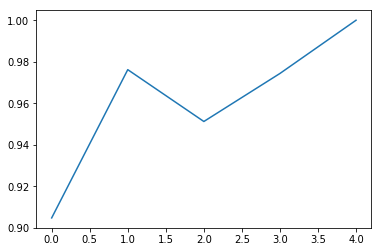

In [258]:
plt.plot(range(5),scores)

In [259]:
scores.mean()

0.9613061735012955

In [260]:
models.append('SVM')
value.append(scores.mean()*100)

#### K-fold Cross-validation for Decision Tree Classifier

In [261]:
model = tree.DecisionTreeClassifier()

In [262]:
scores = cross_val_score(model,my_file,mylabel,cv=5)

In [263]:
scores

array([0.83333333, 0.95238095, 0.90243902, 0.87179487, 0.86842105])

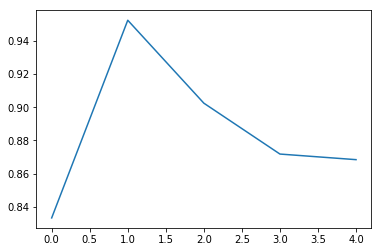

In [264]:
plt.plot(range(5),scores)

In [265]:
scores.mean()

0.8856738469061961

In [266]:
models.append('Decision Tree')
value.append(scores.mean()*100)

In [267]:
models

['SVM', 'Decision Tree']

In [268]:
value

[96.13061735012955, 88.5673846906196]

#### K-fold Cross-validation for Naive-Bayes Classifier

In [269]:
from sklearn.naive_bayes import GaussianNB

In [270]:
model = GaussianNB()

In [271]:
scores = cross_val_score(model,my_file,mylabel,cv=5)

In [272]:
scores

array([0.57142857, 0.47619048, 0.56097561, 0.38461538, 0.47368421])

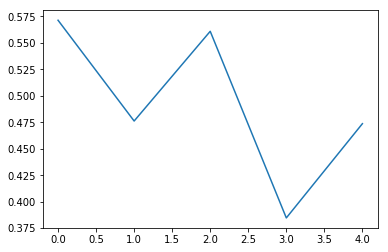

In [273]:
plt.plot(range(5),scores)

In [274]:
scores.mean()

0.4933788505033691

In [275]:
models.append('Naive-Bayes')
value.append(scores.mean()*100)

In [276]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes'],
 [96.13061735012955, 88.5673846906196, 49.33788505033691])

#### k-fold Cross-validation for k-nearest neighbour classifier

In [277]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'auto') 

In [278]:
scores = cross_val_score(model,my_file,mylabel,cv=5)

In [279]:
scores

array([0.85714286, 0.88095238, 0.87804878, 0.87179487, 0.97368421])

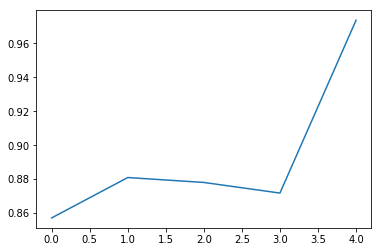

In [280]:
plt.plot(range(5),scores)

In [281]:
scores.mean()

0.892324620180846

In [282]:
models.append('K-NN')
value.append(scores.mean()*100)

In [283]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN'],
 [96.13061735012955, 88.5673846906196, 49.33788505033691, 89.2324620180846])


#### K-fold Cross-validation for Random Forset Classifier 

In [284]:
model = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')

In [285]:
scores = cross_val_score(model,my_file,mylabel,cv=5)

In [286]:
scores

array([0.9047619 , 0.95238095, 0.92682927, 0.8974359 , 0.97368421])

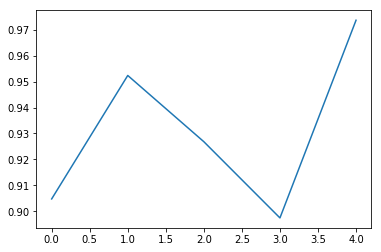

In [287]:
plt.plot(range(5),scores)

In [288]:
scores.mean()

0.9310184466795507

In [289]:
models.append('Random Forest')
value.append(scores.mean()*100)

In [290]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN', 'Random Forest'],
 [96.13061735012955,
  88.5673846906196,
  49.33788505033691,
  89.2324620180846,
  93.10184466795506])

#### K-fold Cross-validation for AdaBoost Classifier 

In [291]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.005, random_state = 42)

In [292]:
scores = cross_val_score(adabst,my_file,mylabel,cv=5)

In [293]:
scores

array([0.92857143, 0.92857143, 0.92682927, 0.87179487, 0.97368421])

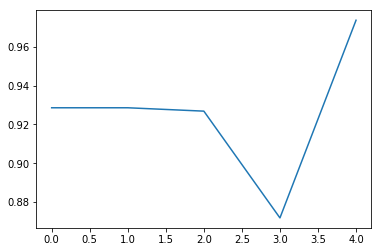

In [294]:
plt.plot(range(5),scores)

In [295]:
scores.mean()

0.9258902415513456

In [296]:
models.append('AdaBoost')
value.append(scores.mean()*100)

In [297]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN', 'Random Forest', 'AdaBoost'],
 [96.13061735012955,
  88.5673846906196,
  49.33788505033691,
  89.2324620180846,
  93.10184466795506,
  92.58902415513455])

### Comparison of diiferent classification models

In [298]:
models

['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN', 'Random Forest', 'AdaBoost']

In [299]:
value

[96.13061735012955,
 88.5673846906196,
 49.33788505033691,
 89.2324620180846,
 93.10184466795506,
 92.58902415513455]

In [300]:
type(models),type(value)

(list, list)

In [301]:
value = np.asarray(value)

In [302]:
x_label = np.arange(len(models))

Text(0.5,1,'Average accuracy chart of different classification models')

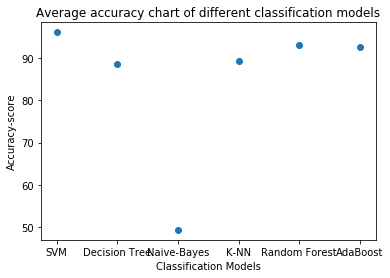

In [308]:
plt.scatter(x_label,value)
plt.xticks(x_label,models)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy-score')
plt.title('Average accuracy chart of different classification models')

Text(0.5,1,'Average accuracy chart of different classification models')

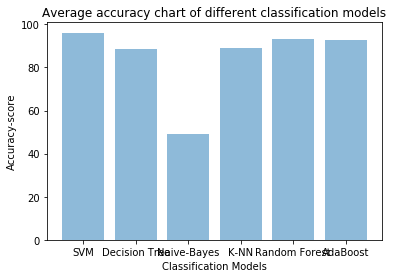

In [309]:
plt.bar(x_label,value,align = 'center', alpha = 0.5)
plt.xticks(x_label,models)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy-score')
plt.title('Average accuracy chart of different classification models')

Text(0.5,1,'Average accuracy chart of different classification models')

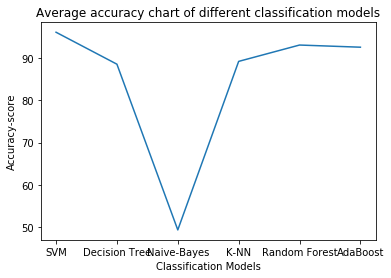

In [310]:
plt.plot(x_label,value)
plt.xticks(x_label,models)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy-score')
plt.title('Average accuracy chart of different classification models')